In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer


In [19]:
dataset = pd.read_csv('Datasets/train.csv')
dataset.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = dataset.SalePrice
X = dataset.drop('SalePrice', axis=1).select_dtypes(exclude=['object'])
cols_to_use = ['LotArea','OverallQual','OverallCond']
training_X = dataset[cols_to_use]


imputer = Imputer()
train_X = imputer.fit_transform(training_X)

In [13]:
training_X

,LotArea,OverallQual,OverallCond
0,8450,7,5
1,9600,6,8
2,11250,7,5
3,9550,7,5
4,14260,8,5
5,14115,5,5
6,10084,8,5
7,10382,7,6
8,6120,7,5
9,7420,5,6


In [20]:
train_X

array([[8.450e+03, 7.000e+00, 5.000e+00],
       [9.600e+03, 6.000e+00, 8.000e+00],
       [1.125e+04, 7.000e+00, 5.000e+00],
       ...,
       [9.042e+03, 7.000e+00, 9.000e+00],
       [9.717e+03, 5.000e+00, 6.000e+00],
       [9.937e+03, 5.000e+00, 6.000e+00]])

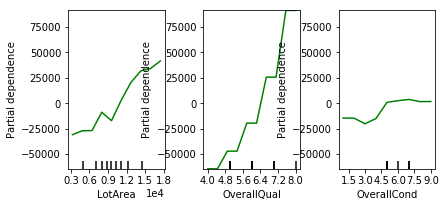

In [23]:
from sklearn.ensemble import GradientBoostingRegressor
GBR_model = GradientBoostingRegressor()
GBR_model.fit(training_X, y)
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
plot_partial_dependence = plot_partial_dependence(GBR_model, 
                                                  features = [0, 1, 2],
                                                  X=train_X,
                                                  feature_names = cols_to_use,
                                                  grid_resolution=10
                                                 )

In [24]:
print("Negative partial dependence means the prices would have been less than the actual average price for that distance.")

You'll see some negative numbers. That doesn't mean the price would sell for a negative price. Instead it means the prices would have been less than the actual average price for that distance.


In [27]:
print("Partial dependence plots are a great way (though not the only way) to extract insights from complex models. These can be incredibly powerful for communicating those insights to colleagues or non-technical users. \n There are a variety of opinions on how to interpret these plots when they come from non-experimental data. Some claim you can conclude nothing about cause-and-effect relationships from data unless it comes from experiments. \n Others are more positive about what can be learned from non-experimental data (also called observational data). It's a divisive topic in the data science world, beyond the scope of this tutorial.However most agree that these \n are useful to understand your model. Also, given the messiness of most real-world data sources, it's also a good sanity check that your model is capturing realistic patterns.The partial_dependence_plot function is an easy way to \n get these plots, though the results aren't visually beautiful. The partial_dependence function gives you the raw data, in case you want to make presentation-quality graphs.")

Partial dependence plots are a great way (though not the only way) to extract insights from complex models. These can be incredibly powerful for communicating those insights to colleagues or non-technical users. 
 There are a variety of opinions on how to interpret these plots when they come from non-experimental data. Some claim you can conclude nothing about cause-and-effect relationships from data unless it comes from experiments. 
 Others are more positive about what can be learned from non-experimental data (also called observational data). It's a divisive topic in the data science world, beyond the scope of this tutorial.However most agree that these 
 are useful to understand your model. Also, given the messiness of most real-world data sources, it's also a good sanity check that your model is capturing realistic patterns.The partial_dependence_plot function is an easy way to 
 get these plots, though the results aren't visually beautiful. The partial_dependence function gives y